探索性数据分析

现在我们对数据有了很好的直观感觉，下一步包括更仔细地查看属性和数据值。
在这一节中，我熟悉了数据，这将为数据预处理提供有用的知识。

2.1数据探索的目的
    探索性数据分析(EDA)是特征工程和数据获取之后非常重要的一步，应该在任何建模之前进行。
这是因为对于数据科学家来说，能够在不做假设的情况下理解数据的本质是非常重要的。
数据探索的结果在掌握数据的结构、值的分布以及数据集中极值和相互关系的存在方面非常有用。
EDA的目的是:
    使用汇总统计和可视化来更好地理解数据，找到关于数据趋势的线索，它的质量，并制定假设和我们分析的假设为了使数据预处理成功，对数据有一个全面的了解是必不可少的。
    基本的统计描述可以用来识别数据的属性，并突出显示哪些数据值应该被视为噪声或异常值。
下一步是探索数据。有两种方法用于检查数据:
    1.描述统计是将数据集的关键特征浓缩成简单的数字度量的过程。一些常用的度量是平均值、标准偏差和相关性。
    2.可视化是将数据或数据的一部分投射到笛卡尔空间或抽象图像中的过程。在数据挖掘过程中，数据探索在许多不同的步骤中得到利用，包括预处理、建模和结果解释。

2.2描述性统计
摘要统计是用来描述数据的度量。在描述性统计领域，有许多总结性测量)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#加载库并进行数据处理
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns # 可视化
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [2]:
data = pd.read_csv('data/data.csv')
##基本描述性统计
data.iloc[:,2:32].describe()#此时数据集没有ID这一列，便于观察

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
#按诊断分组，并检查输出
# 一般用于组内聚合统计，如计算组间的均值，中位数等
diag_gr = data.groupby('diagnosis')
pd.DataFrame(diag_gr.size(), columns=['观察结果'])

,观察结果
diagnosis,
B,357
M,212


检查来自NB1的二进制编码，以确认将诊断分类数据转换为数字，
其中恶性= 1(表示有癌细胞存在),良性= 0(表示有脓肿)
观察结果
357个观察结果显示没有癌细胞，212个观察结果显示没有癌细胞
让我们通过绘制直方图来证实这一点

2.3单峰数据可视化
    可视化数据的主要目的之一是观察哪些特征对预测恶性或良性癌症最有帮助。
另一个是看到可能有助于我们进行模型选择和超参数选择的一般趋势。
    应用3种可以用来独立理解数据集的每个属性的技术。
    直方图,密度图,箱线图和热图。

In [4]:
#让我们了解一下癌症诊断的频率
# 统一设置 图片背景和图片尺寸
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})

2.3.1通过直方图可视化数据分布
    直方图通常用于可视化数值变量，直方图类似于条形图，将变量的值分组(分类)到有限数量的区间(分类)中。
直方图将数据分组到bin中，并为您提供每个bin中观察值的计数。从箱子的形状，你可以很快得到一个属性是高斯分布，偏态分布还是指数分布的感觉。它还可以帮助你发现可能的异常值。
将列分隔成较小的数据框架以执行可视化

In [5]:
#根据列的后缀名称将列分成组
#(_mean,_se,_worst)执行可视化绘图
data_mean=data.iloc[:,2:12]
data_se=data.iloc[:,12:22]
data_worst=data.iloc[:,22:31]

print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)



Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


直方图“_mean”后缀名称

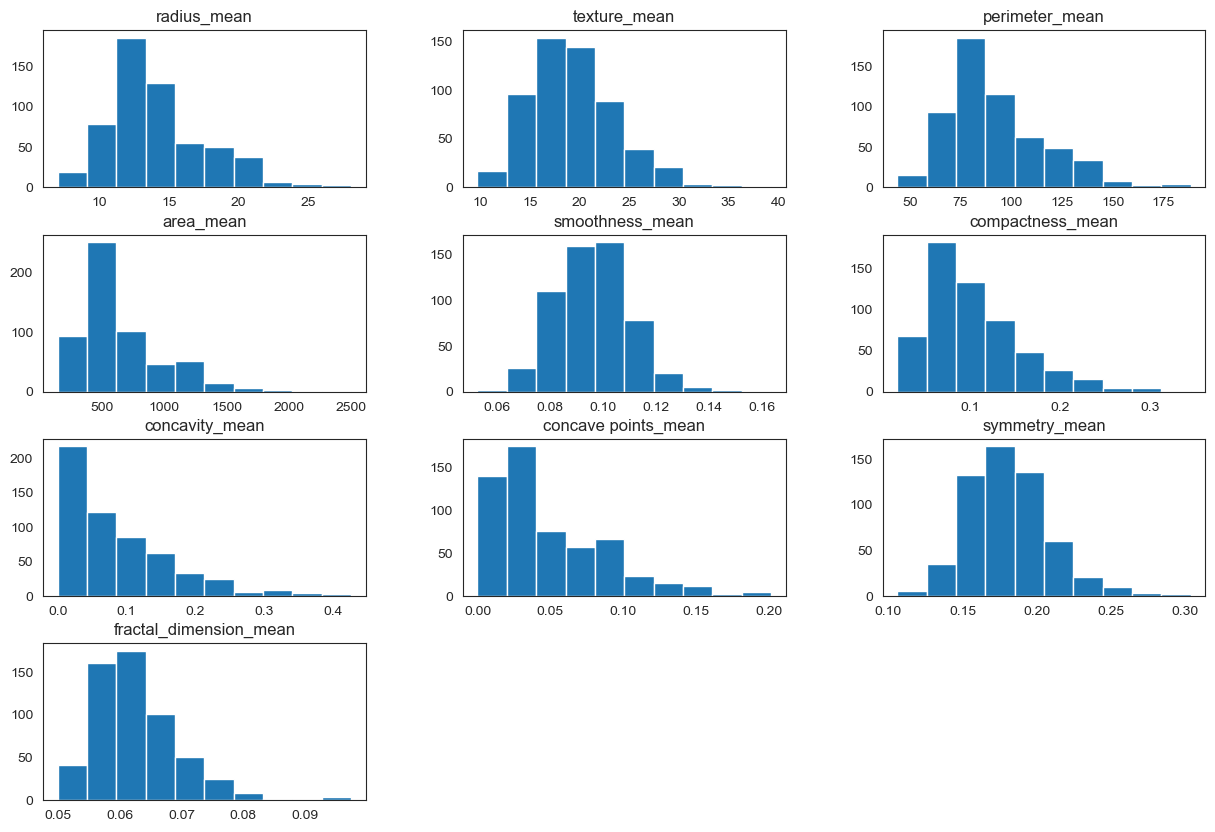

In [6]:
#绘制_mean变量的直方图
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)
##任何单独的直方图都使用这个
#data['radius_worst'].hist(bins=100)

直方图“_se”后缀名称

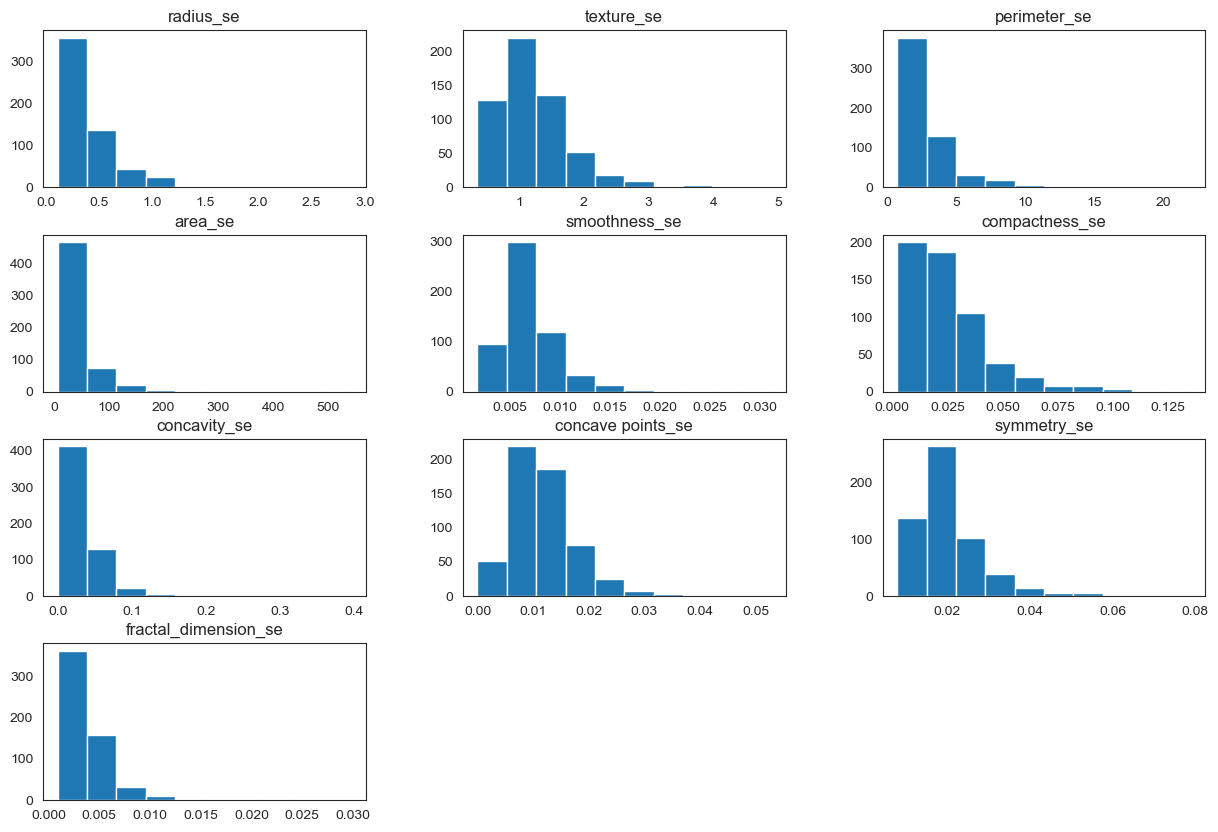

In [7]:
#绘制_se变量的直方图
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

直方图“_worst”后缀名称

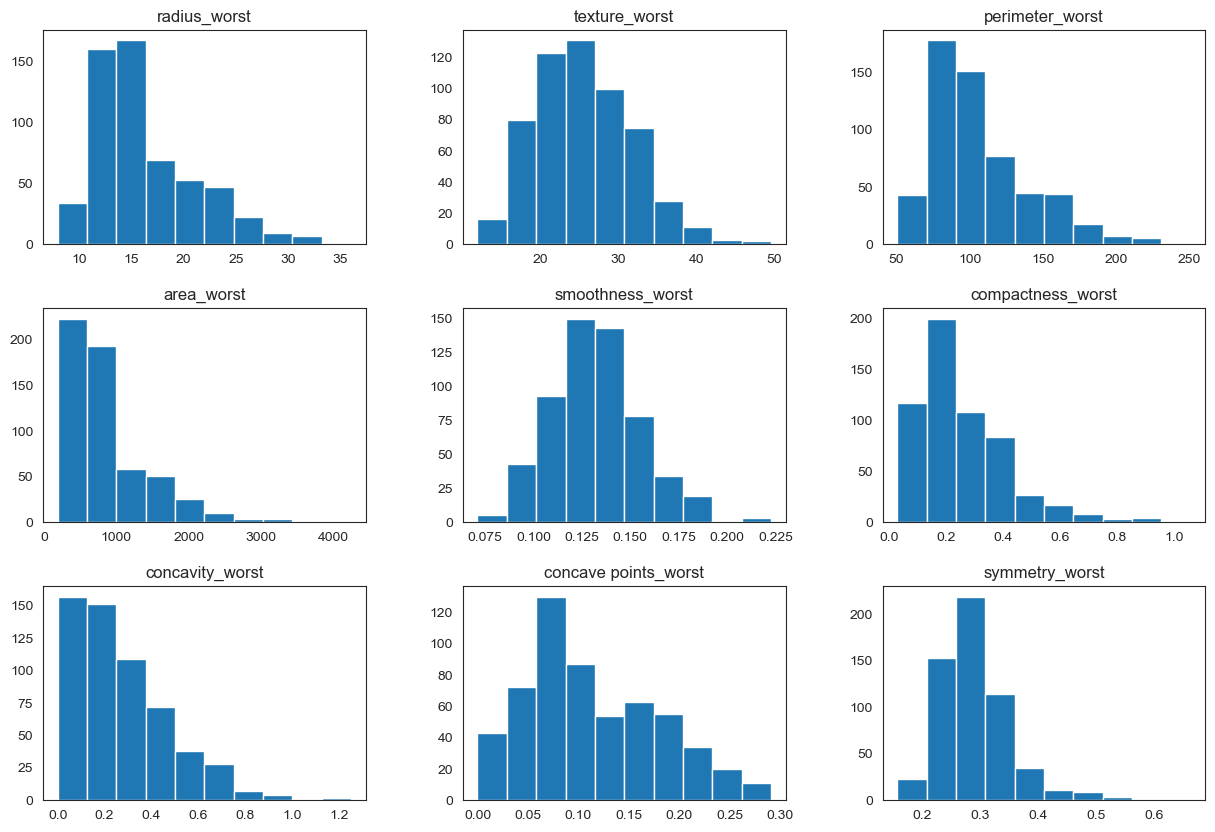

In [8]:
#绘制_worst变量的直方图
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

观察啊我们可以看到，属性concavity和**concavity_point**可能具有指数分布()。
我们也可以看到也许纹理，光滑和对称属性可能有一个高斯或接近高斯分布。
这是因为许多机器学习技术假设输入变量是高斯单变量分布。

2.3.2通过密度图T可视化数据分布

密度图“_mean”后缀名称

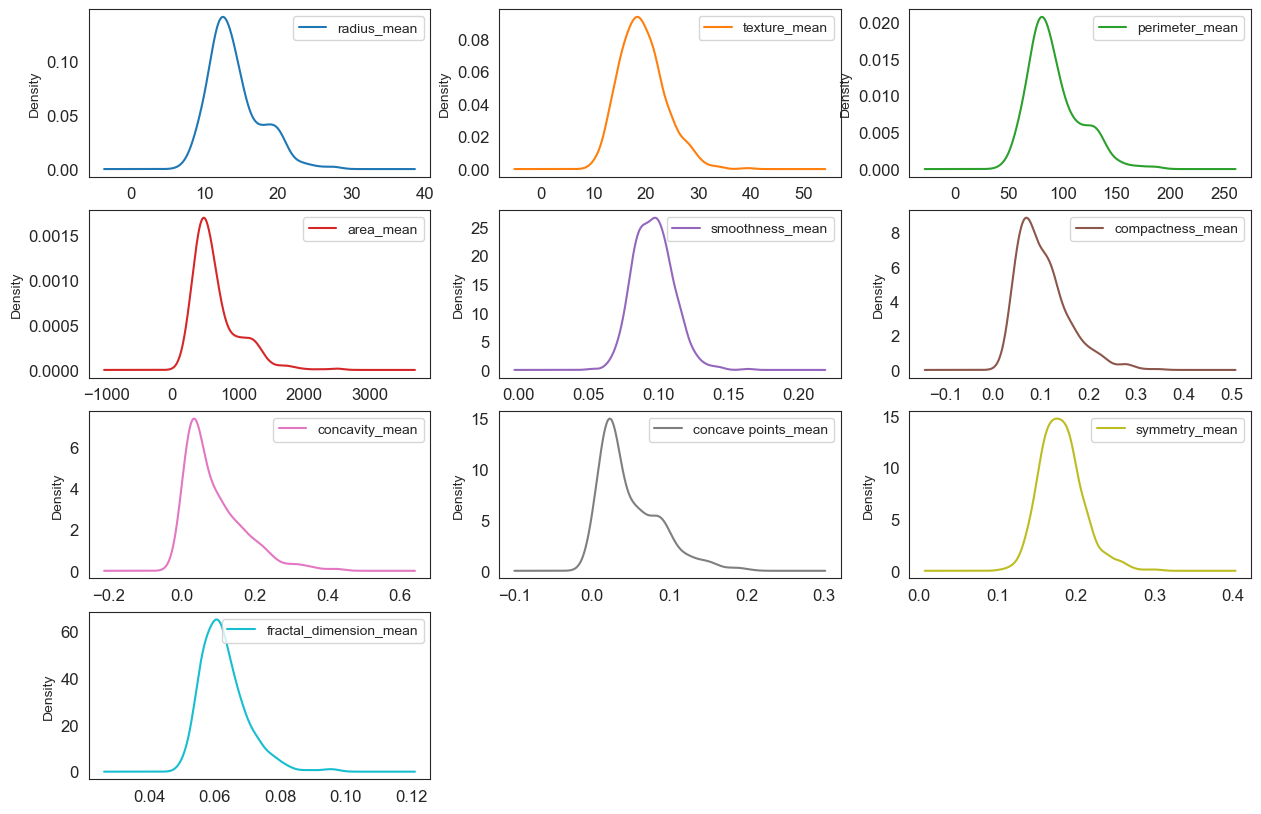

In [9]:
#绘制_mean变量的密度图
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,   
                     sharey=False,fontsize=12, figsize=(15,10))


密度图“_se”后缀名称

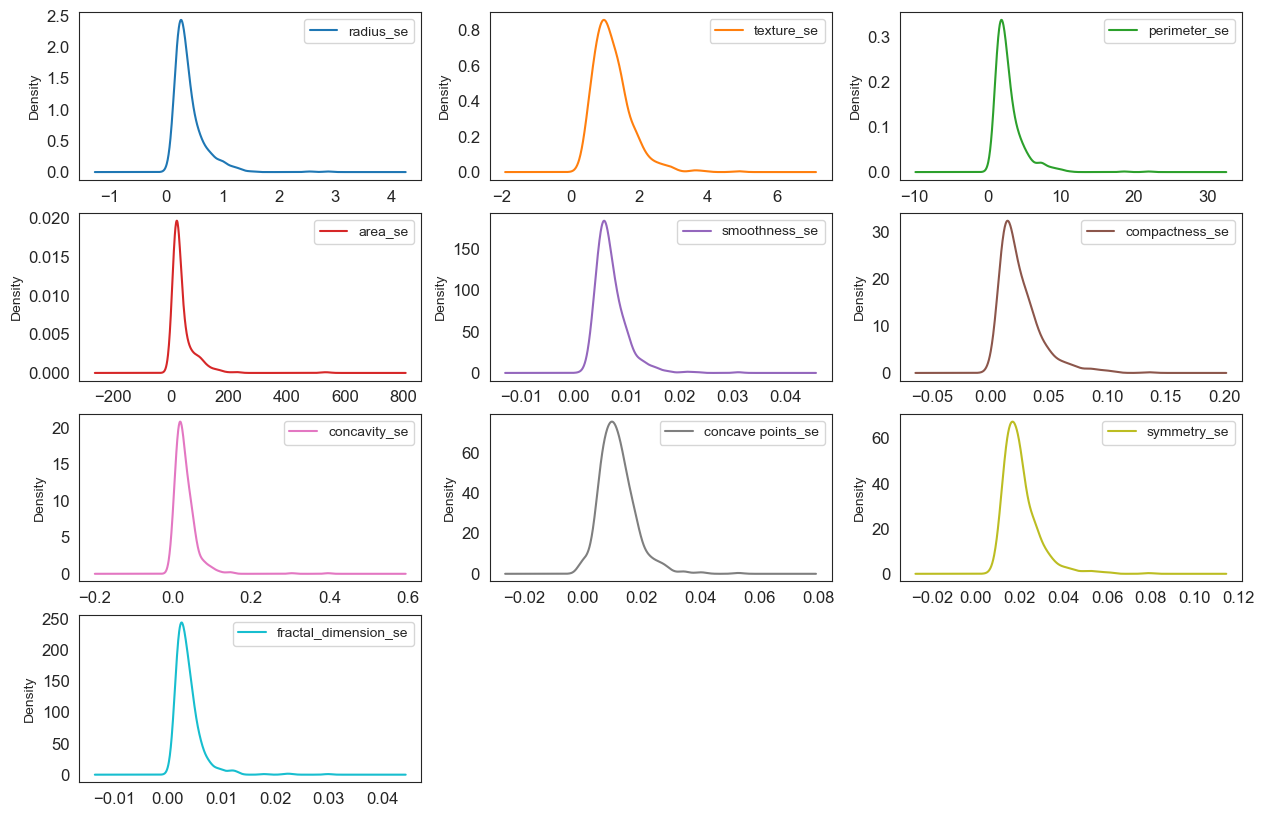

In [10]:
#绘制_se变量的密度图
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                   sharey=False,fontsize=12, figsize=(15,10))

密度图“_worst”后缀名称

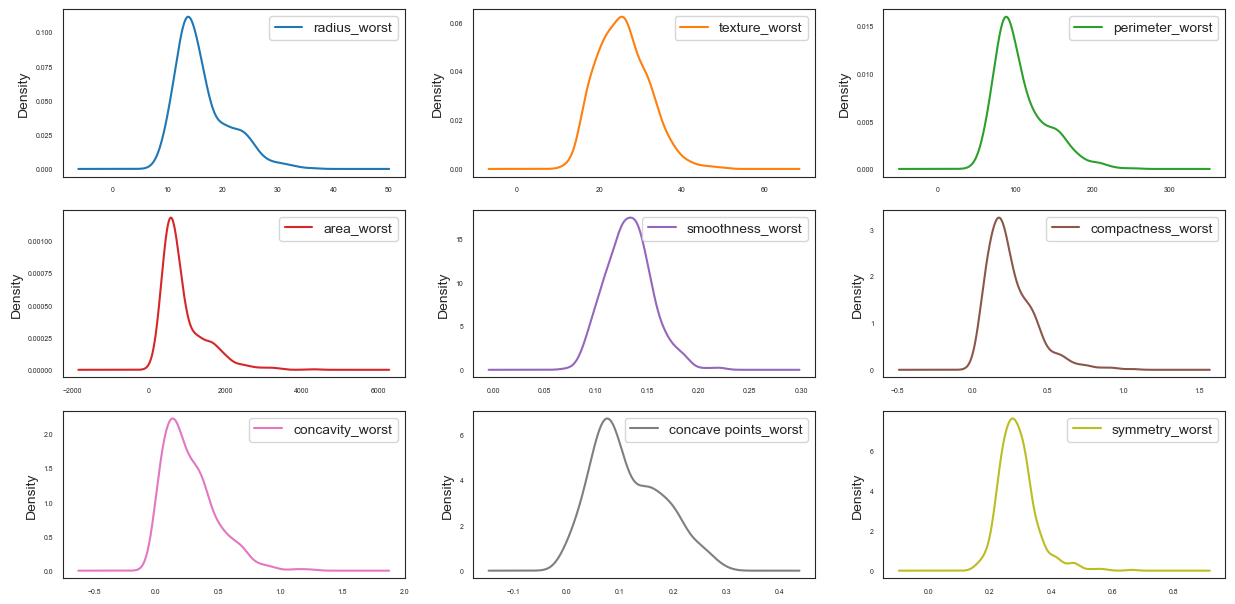

In [11]:
#绘制_worst变量的密度图
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                     figsize=(15,10))

观察我们可以看到，周长、半径、面积、凹凸度、紧度等属性可能呈指数分布()。
我们还可以看到，纹理，平滑和对称属性可能具有高斯分布或接近高斯分布。
这很有趣，因为许多机器学习技术假设输入变量是高斯单变量分布。

2.4多模态数据可视化
1.散点图
2.相关矩阵

相关矩阵

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

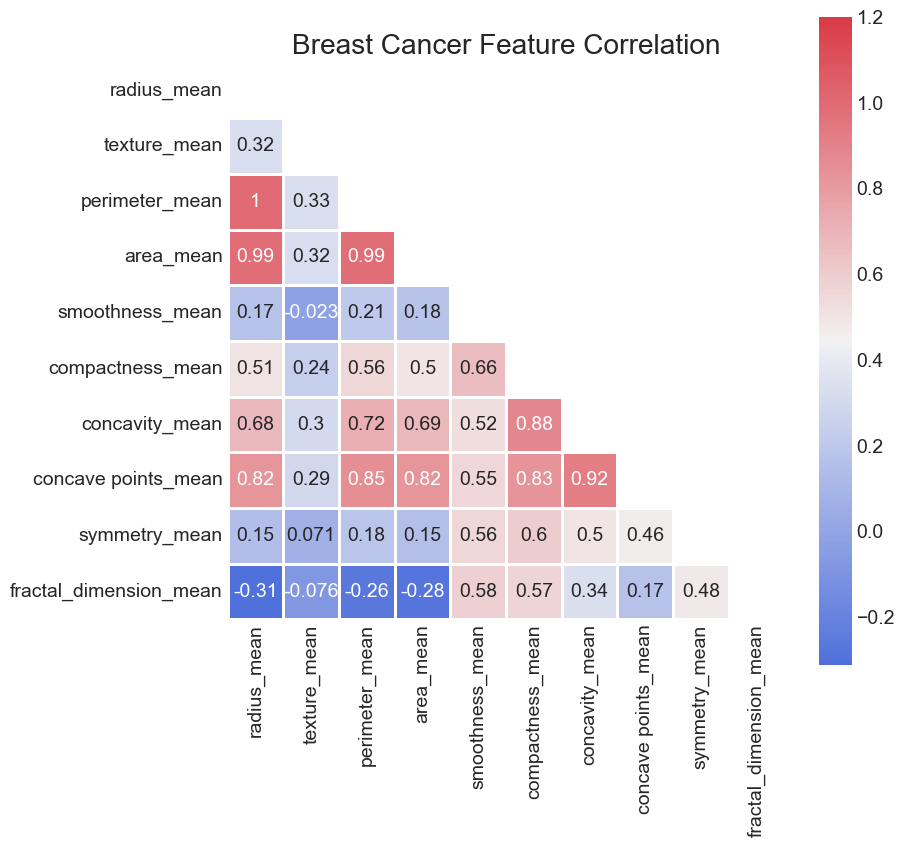

In [12]:
#图相关矩阵
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/data.csv', index_col=False)
##基本描述性统计
#计算相关矩阵
corr = data_mean.corr()

#生成上方三角形的蒙版
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#设置matplotlib图
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

#生成一个自定义发散色图
cmap = sns.diverging_palette(260, 10, as_cmap=True)

#用蒙版和正确的宽高比绘制热图
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

观察:均值参数在1-0.75之间存在较强的正相关;
组织核的平均面积与半径和参数的平均值有较强的正相关;凹凸度与面积、凹凸度与周长等参数呈中等正相关(r在0.5 ~ 0.75之间)
同样，我们看到分形维数与半径、纹理、参数均值之间存在较强的负相关关系。

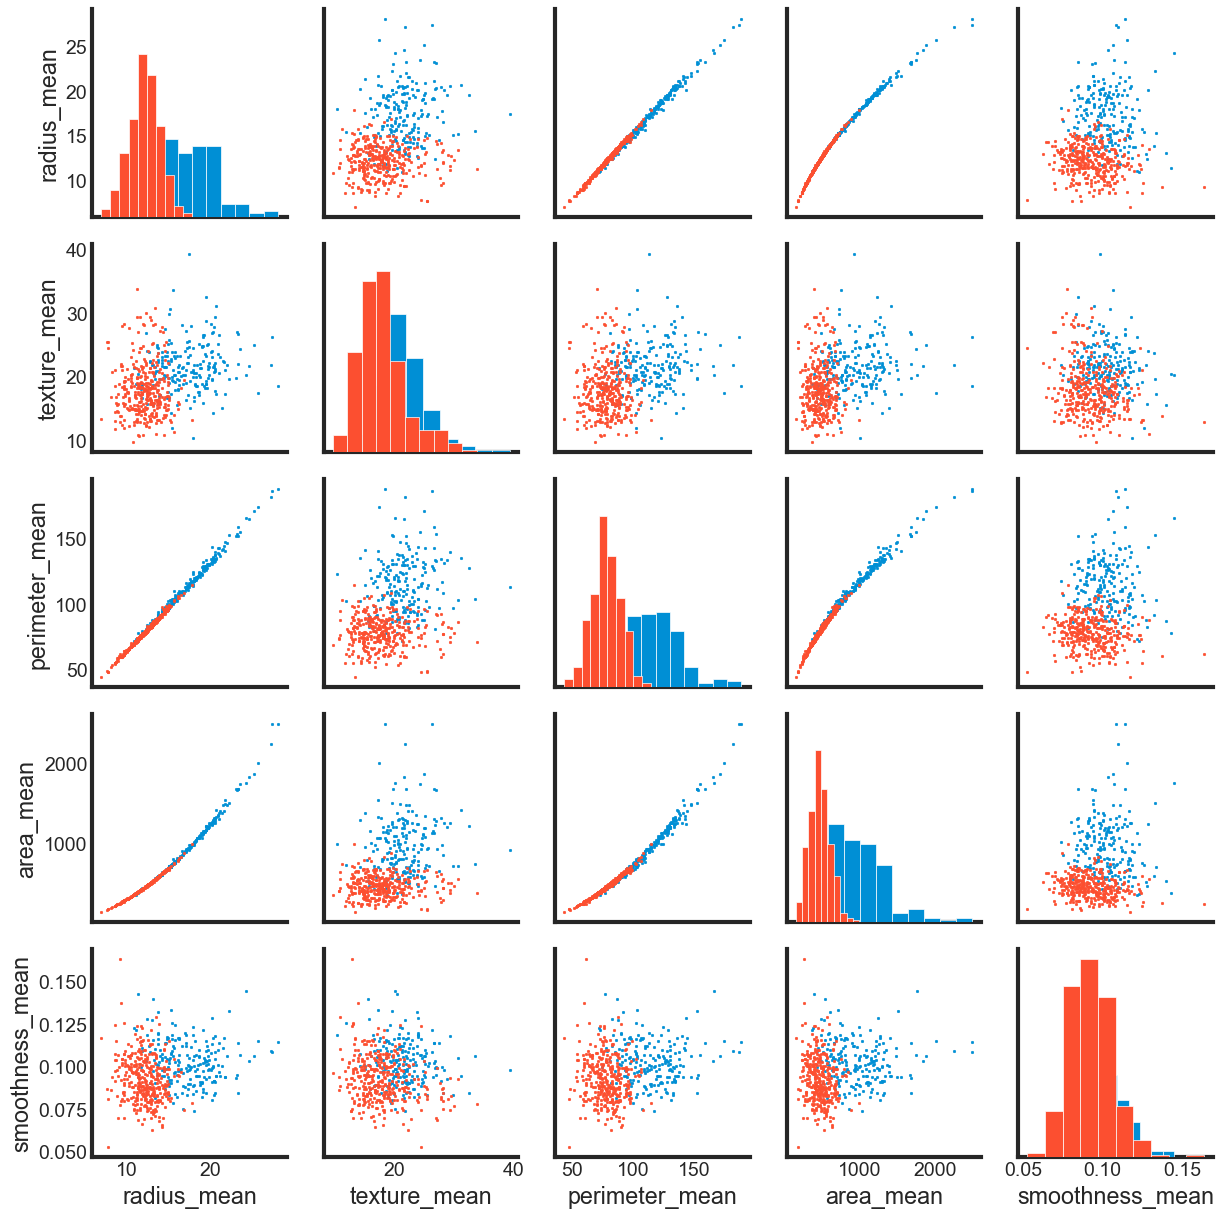

In [13]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv('data/data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

总结
细胞半径、周长、面积、密实度、凹凸点和凹点的平均值可用于肿瘤的分类。
这些参数值越大，往往与恶性肿瘤有关。纹理、平滑度、对称性或分形维数的平均值并不表明一种诊断比另一种诊断有特别的偏好。
在任何直方图中，都没有值得进一步清理的明显的大异常值。